# Part I: Current COVID Data
## Question 1
### (A) Please first in read the us_states.csv file as a Pandas DataFrame. This file contains one observation per state per day from late January through September 28, 2020, with data on the number of total cases and deaths in each state per day. Print the first 5 rows in the dataset and the shape of the dataset. (Points: 1)

In [51]:
# Import packages 
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # https://github.com/ResidentMario/missingno


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Import data 
us_states = pd.read_csv("../us_states.csv")

# First five rows of data 
us_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [53]:
# Data dimensions 
us_states.shape

(11564, 5)

### (B) Create a new object called sept_covid which contains only observations corresponding to the most recent date in the data.

In [54]:
# Create sept_covid variable with only 2020-09-28 values 
sept_covid = us_states[us_states["date"] == '2020-09-28']
sept_covid.sample(10, random_state = 123)

,date,state,fips,cases,deaths
11558,2020-09-28,Virgin Islands,78,1318,20
11549,2020-09-28,Pennsylvania,42,161642,8181
11520,2020-09-28,Guam,66,3255,40
11536,2020-09-28,Montana,30,12538,174
11535,2020-09-28,Missouri,29,127411,2121
11532,2020-09-28,Michigan,26,135782,7052
11559,2020-09-28,Virginia,51,146593,3172
11560,2020-09-28,Washington,53,90596,2199
11522,2020-09-28,Idaho,16,41386,460
11530,2020-09-28,Maryland,24,124371,3938


In [55]:
# Check for dates other than 2020-09-28
for x in sept_covid['date']: 
    if x != '2020-09-28': 
        print(x) 

## Question 2
### (A) Please read in the files 2016_election_results.csv, mask_requirement.csv, state_ACS_data.csv, and stay_order.csv. All of these contain data at the state level. Merge all of these data files together, and then merge this object with the object created in the previous question (sept_covid).2 (Points: 3)





In [56]:
# Read in election data 
election_results = pd.read_csv("../2016_election_results.csv")
election_results.head()

,state,trump_2016_vote_share,trump_won
0,Alabama,62.10%,Yes
1,Alaska,51.30%,Yes
2,Arizona,48.10%,Yes
3,Arkansas,60.60%,Yes
4,California,31.50%,No


In [57]:
# Read in mask requirement data 
mask_requirement = pd.read_csv("../mask_requirement.csv")
mask_requirement.head()

,state,mask_requirement_detail,maskreq_effective_date
0,Alabama,Entire State,7/16/20
1,Alaska,Parts of State,NaN
2,Arizona,Parts of State (Employees Only),NaN
3,Arkansas,Entire State,7/20/20
4,California,Entire State,6/18/20


In [58]:
# Read in state demographic data 
state_ACS = pd.read_csv("../state_ACS_data.csv")
state_ACS.head()

,state,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,Alabama,1,4864680,65.713058,17.489743,48486,9.978475
1,Alaska,2,738516,61.035103,10.804469,76715,14.417467
2,Arizona,4,6946685,55.074989,16.087707,56213,10.942914
3,Arkansas,5,2990671,72.687668,17.579624,45726,9.037174
4,California,6,39148760,37.538446,14.286675,71228,8.485982


In [59]:
# Read in state order data 
stay_order = pd.read_csv("../stay_order.csv")
stay_order.head()

,state,effective,enforcement
0,Alabama,4/4/2020 - 4/30/2020,No
1,Alaska,3/28/2020 - 4/24/2020,Yes
2,Arizona,3/31/2020 - 5/15/2020,Yes
3,Arkansas,NaN,NaN
4,California,3/19/2020 - Until lifted,Yes


In [60]:
# Correct mispelling in election_results 
election_results.at[17, 'state'] = 'Kentucky'

# Change format of D.C. in mask_requirement to match other data sets
mask_requirement.at[8, 'state'] = 'District of Columbia'

# Change format of WV in stay_order 
stay_order.at[49, 'state'] = 'West Virginia'

In [61]:
# Import functools for reduce function
from functools import reduce

# Create list of dfs 
dtas = [election_results, mask_requirement, state_ACS, stay_order, sept_covid]

# Merge data 
merged_data = reduce(lambda  left,right: pd.merge(left,right,on=['state'], how='outer'), dtas)
merged_data.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths
49,Wisconsin,47.20%,Yes,Entire State,8/1/20,55.0,5778394.0,81.528501,11.872685,59209.0,5.773083,3/25/2020 - 5/13/2020,Yes,2020-09-28,55,124320,1293
40,South Carolina,54.90%,Yes,Entire State (Most Indoor Public Places),NaN,45.0,4955925.0,63.700984,16.008037,51015.0,11.016274,4/6/2020 - 5/4/2020,Yes,2020-09-28,45,146455,3337
11,Hawaii,30.00%,No,Entire State,4/20/20,15.0,1422029.0,22.118818,9.938813,78084.0,4.058641,3/25/2020 - 5/31/2020,Yes,2020-09-28,15,12351,131
27,Nebraska,58.70%,Yes,Entire State (Employees Only),NaN,31.0,1904760.0,79.396564,11.554686,59116.0,8.415553,NaN,NaN,2020-09-28,31,44578,487
26,Montana,55.60%,Yes,Entire State,7/15/20,30.0,1041732.0,86.294076,13.681822,52559.0,10.219309,3/29/2020 - 4/26/2020,Yes,2020-09-28,30,12538,174
23,Minnesota,44.90%,No,Entire State,7/25/20,27.0,5527358.0,80.292809,10.130997,68411.0,4.657997,3/27/2020 - 5/17/2020,Yes,2020-09-28,27,97690,2067
50,Wyoming,68.20%,Yes,Parts of State,NaN,56.0,581836.0,84.140376,11.147284,62268.0,11.345408,NaN,NaN,2020-09-28,56,5754,50
51,Puerto Rico,NaN,NaN,NaN,NaN,72.0,3386941.0,0.827148,44.541588,20166.0,6.240892,3/15/2020 - 6/12/2020,Yes,2020-09-28,72,47422,648
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,3/25/2020 - 5/31/2020,Yes,2020-09-28,17,293169,8877
21,Massachusetts,32.80%,No,Entire State,5/6/20,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,3/24/2020 - 5/18/2020,No,2020-09-28,25,131072,9415


### (B) Visually assess whether there are any missing/null values in your data. Drop all observations containing null values for any of the columns except for the maskreq_effective_date, effective, and enforcement columns (i.e., keep rows for states whose only null values occur in these three columns). (Points: 2)


<AxesSubplot:>

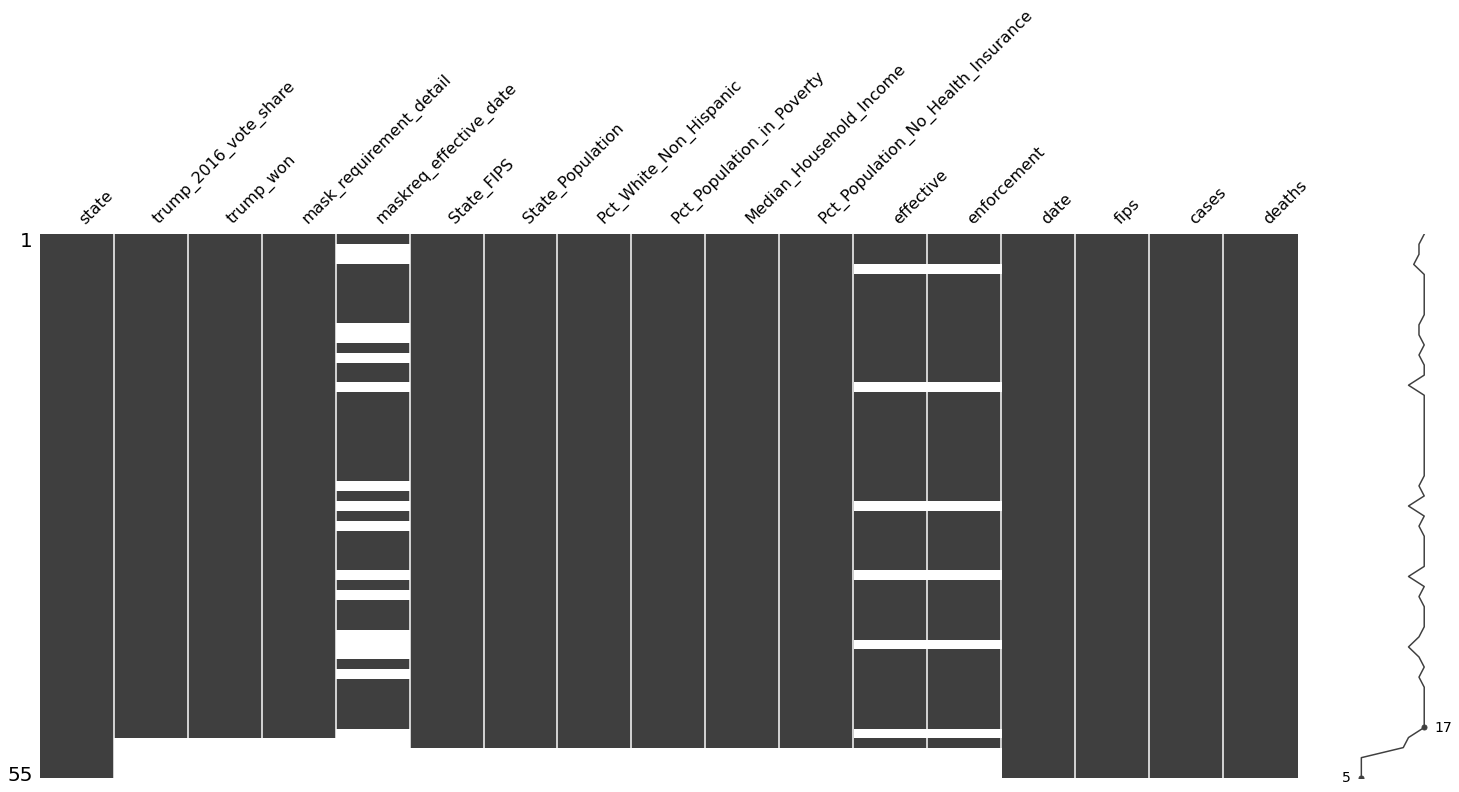

In [62]:
# Visualize missing data 
msno.matrix(merged_data)

<AxesSubplot:>

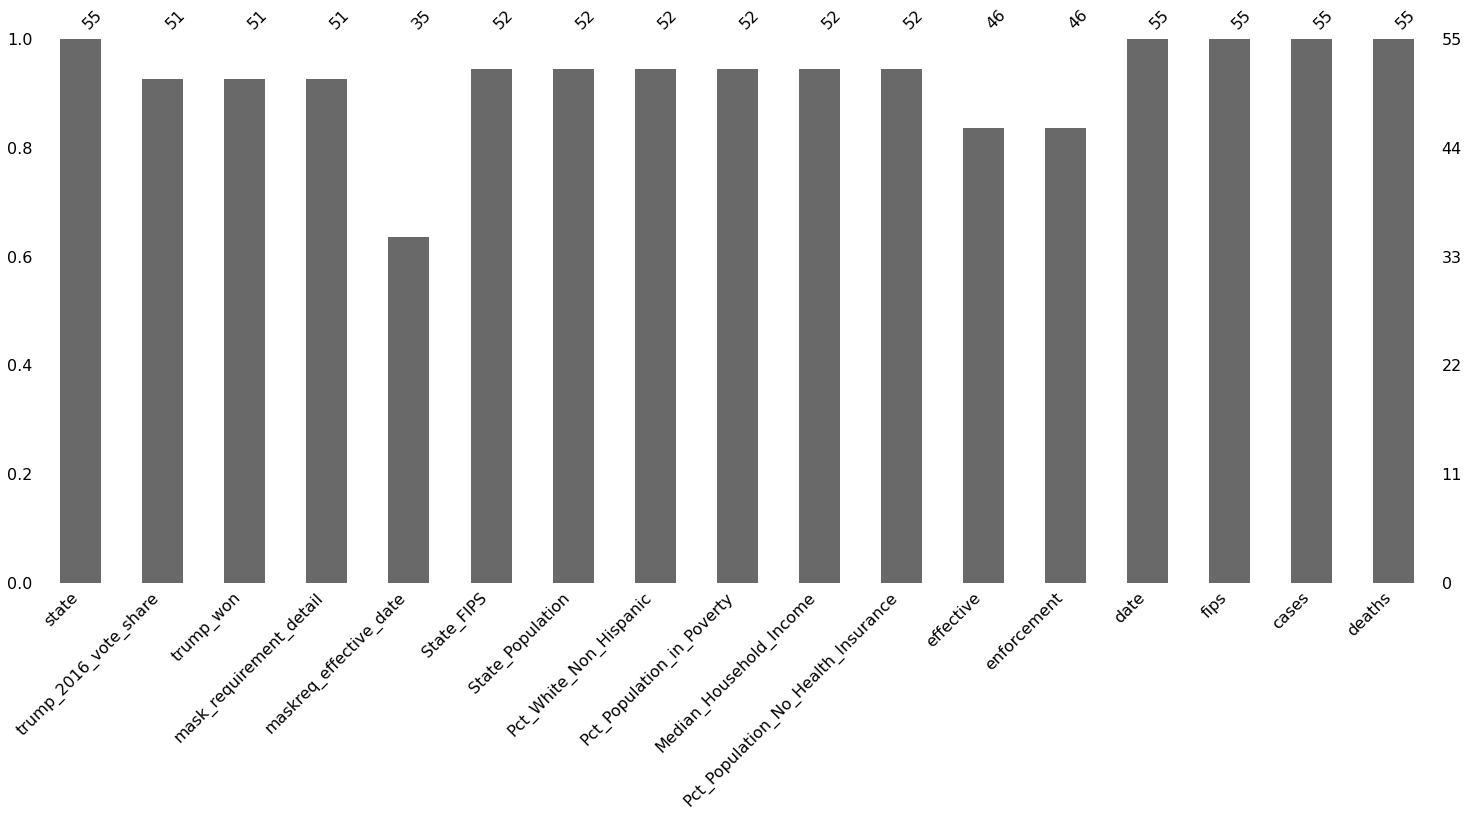

In [63]:
# Missing data bar graph 
msno.bar(merged_data)

In [64]:
# Drop na values
dta_na = merged_data.dropna(subset = ['state', 'trump_2016_vote_share', 'trump_won', 'mask_requirement_detail', 'State_FIPS', 'State_Population','Pct_White_Non_Hispanic', 'Pct_Population_in_Poverty', 'Median_Household_Income', 'Pct_Population_No_Health_Insurance', 'date', 'fips', 'cases', 'deaths'])
dta_na.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths
29,New Hampshire,46.50%,No,Parts of State,NaN,33.0,1343622.0,90.393504,7.869211,74057.0,6.505143,3/27/2020 - 6/15/2020,Yes,2020-09-28,33,8208,439
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,3/25/2020 - 5/31/2020,Yes,2020-09-28,17,293169,8877
47,Washington,36.80%,No,Entire State,6/26/20,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,3/25/2020 - 5/31/2020,Yes,2020-09-28,53,90596,2199
31,New Mexico,40.00%,No,Entire State,5/15/20,35.0,2092434.0,37.674211,20.010630,48059.0,10.712380,3/24/2020 - 5/31/2020,No,2020-09-28,35,28985,873
10,Georgia,50.40%,Yes,Parts of State (Employees Only),NaN,13.0,10297484.0,53.182321,16.037545,55679.0,13.745003,4/3/2020 - 4/30/2020,Yes,2020-09-28,13,298963,6803
12,Idaho,59.20%,Yes,Parts of State,NaN,16.0,1687809.0,82.216293,13.816196,53089.0,11.026750,3/25/2020 - 4/30/2020,Yes,2020-09-28,16,41386,460
35,Ohio,51.30%,Yes,Entire State,7/23/20,39.0,11641879.0,79.202318,14.541679,54533.0,6.480761,3/23/2020 - 5/29/2020,Yes,2020-09-28,39,151802,4746
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501
43,Texas,52.20%,Yes,Entire State,7/3/20,48.0,27885195.0,42.342408,15.455659,59570.0,17.378943,3/31/2020 - 4/30/2020,Yes,2020-09-28,48,773679,15898
18,Louisiana,58.10%,Yes,Entire State,7/13/20,22.0,4663616.0,58.844146,19.383758,47942.0,10.683982,3/22/2020 - 5/15/2020,Yes,2020-09-28,22,166315,5480


<AxesSubplot:>

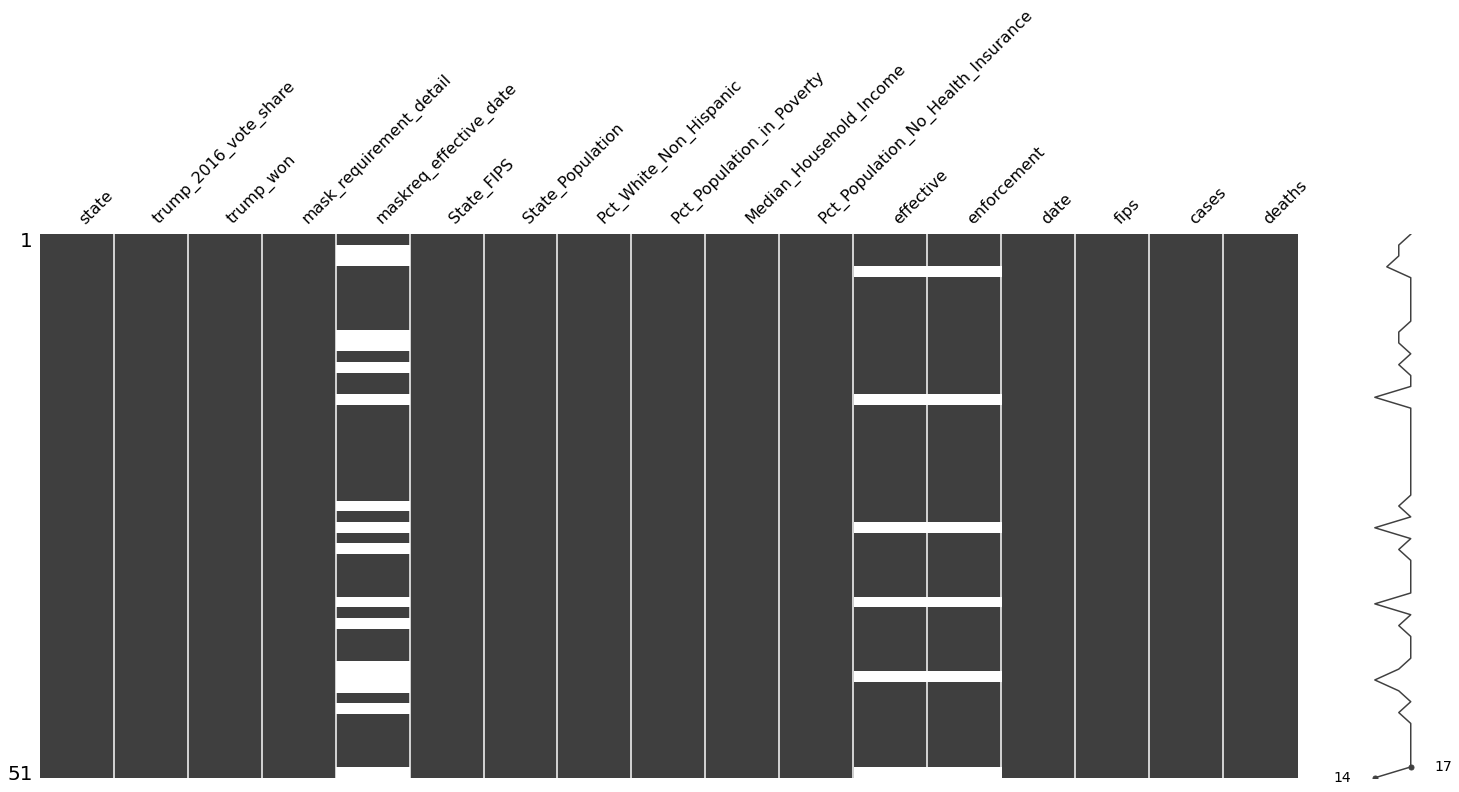

In [65]:
# Visualize missing data after dropping na values 
msno.matrix(dta_na)

<AxesSubplot:>

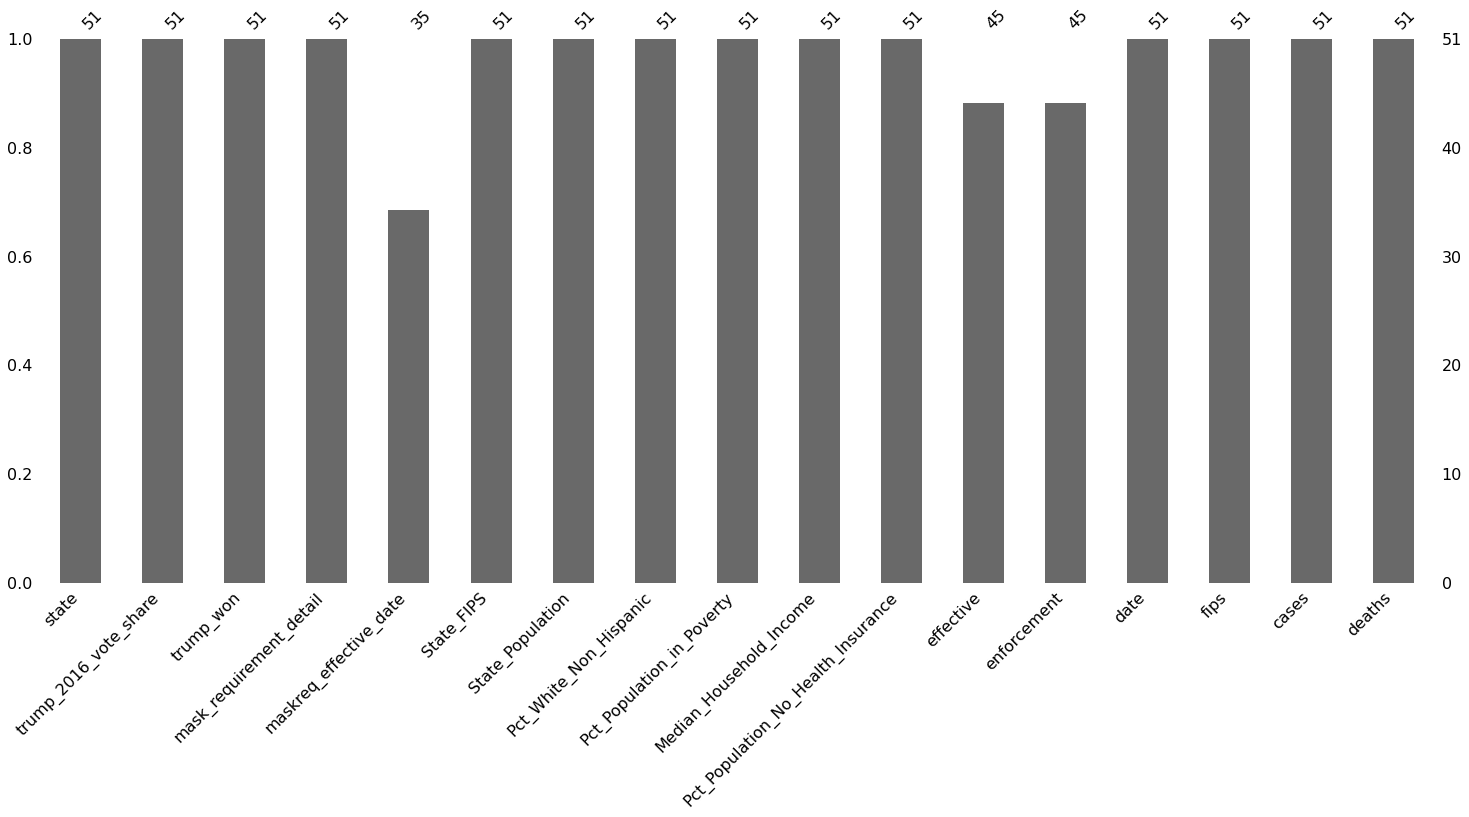

In [66]:
# Visualize missing data after dropping na values (bar graph)
msno.bar(dta_na)

## Question 3
### (A) Using the merged data created in the previous question, create the following variables: (Points: 4)
#### • One which is equal to the total number of cases per 100,000 population (as of September 28). Please name this variable total_cases_per100k.

In [71]:
# Create total_cases_per100k variable 
dta_na = dta_na.assign(total_cases_per100k = ((dta_na.cases / dta_na.State_Population) * 100000))
dta_na.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k
29,New Hampshire,46.50%,No,Parts of State,NaN,33.0,1343622.0,90.393504,7.869211,74057.0,6.505143,3/27/2020 - 6/15/2020,Yes,2020-09-28,33,8208,439,610.886097,32.672880
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,3/25/2020 - 5/31/2020,Yes,2020-09-28,17,293169,8877,2286.542671,69.235285
47,Washington,36.80%,No,Entire State,6/26/20,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,3/25/2020 - 5/31/2020,Yes,2020-09-28,53,90596,2199,1242.004755,30.146678
31,New Mexico,40.00%,No,Entire State,5/15/20,35.0,2092434.0,37.674211,20.010630,48059.0,10.712380,3/24/2020 - 5/31/2020,No,2020-09-28,35,28985,873,1385.228877,41.721746
10,Georgia,50.40%,Yes,Parts of State (Employees Only),NaN,13.0,10297484.0,53.182321,16.037545,55679.0,13.745003,4/3/2020 - 4/30/2020,Yes,2020-09-28,13,298963,6803,2903.262583,66.064681
12,Idaho,59.20%,Yes,Parts of State,NaN,16.0,1687809.0,82.216293,13.816196,53089.0,11.026750,3/25/2020 - 4/30/2020,Yes,2020-09-28,16,41386,460,2452.054705,27.254269
35,Ohio,51.30%,Yes,Entire State,7/23/20,39.0,11641879.0,79.202318,14.541679,54533.0,6.480761,3/23/2020 - 5/29/2020,Yes,2020-09-28,39,151802,4746,1303.930405,40.766615
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398
43,Texas,52.20%,Yes,Entire State,7/3/20,48.0,27885195.0,42.342408,15.455659,59570.0,17.378943,3/31/2020 - 4/30/2020,Yes,2020-09-28,48,773679,15898,2774.515294,57.012332
18,Louisiana,58.10%,Yes,Entire State,7/13/20,22.0,4663616.0,58.844146,19.383758,47942.0,10.683982,3/22/2020 - 5/15/2020,Yes,2020-09-28,22,166315,5480,3566.224149,117.505386


#### • One which is equal to the total number of deaths per 100,000 population (as of September 28). Please name this variable total_deaths_per100k.

In [72]:
# Create total_deaths_per100k variable 
dta_na = dta_na.assign(total_deaths_per100k = ((dta_na.deaths / dta_na.State_Population)* 100000))
dta_na.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k
29,New Hampshire,46.50%,No,Parts of State,NaN,33.0,1343622.0,90.393504,7.869211,74057.0,6.505143,3/27/2020 - 6/15/2020,Yes,2020-09-28,33,8208,439,610.886097,32.672880
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,3/25/2020 - 5/31/2020,Yes,2020-09-28,17,293169,8877,2286.542671,69.235285
47,Washington,36.80%,No,Entire State,6/26/20,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,3/25/2020 - 5/31/2020,Yes,2020-09-28,53,90596,2199,1242.004755,30.146678
31,New Mexico,40.00%,No,Entire State,5/15/20,35.0,2092434.0,37.674211,20.010630,48059.0,10.712380,3/24/2020 - 5/31/2020,No,2020-09-28,35,28985,873,1385.228877,41.721746
10,Georgia,50.40%,Yes,Parts of State (Employees Only),NaN,13.0,10297484.0,53.182321,16.037545,55679.0,13.745003,4/3/2020 - 4/30/2020,Yes,2020-09-28,13,298963,6803,2903.262583,66.064681
12,Idaho,59.20%,Yes,Parts of State,NaN,16.0,1687809.0,82.216293,13.816196,53089.0,11.026750,3/25/2020 - 4/30/2020,Yes,2020-09-28,16,41386,460,2452.054705,27.254269
35,Ohio,51.30%,Yes,Entire State,7/23/20,39.0,11641879.0,79.202318,14.541679,54533.0,6.480761,3/23/2020 - 5/29/2020,Yes,2020-09-28,39,151802,4746,1303.930405,40.766615
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398
43,Texas,52.20%,Yes,Entire State,7/3/20,48.0,27885195.0,42.342408,15.455659,59570.0,17.378943,3/31/2020 - 4/30/2020,Yes,2020-09-28,48,773679,15898,2774.515294,57.012332
18,Louisiana,58.10%,Yes,Entire State,7/13/20,22.0,4663616.0,58.844146,19.383758,47942.0,10.683982,3/22/2020 - 5/15/2020,Yes,2020-09-28,22,166315,5480,3566.224149,117.505386


#### • One which takes on the value of 1 if a state has a statewide (or territory-wide) mask mandate 0 otherwise. Please name this variable m_mandate.

In [73]:
# Create new dummy variable where 1 signfies entire state mask mandate and 0 signifies otherwise 
dta_na["m_mandate"] = np.where((dta_na['mask_requirement_detail'] == "Entire State") | (dta_na['mask_requirement_detail'] == "Entire Territory"), 1,0)
dta_na.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,effective,enforcement,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate
29,New Hampshire,46.50%,No,Parts of State,NaN,33.0,1343622.0,90.393504,7.869211,74057.0,6.505143,3/27/2020 - 6/15/2020,Yes,2020-09-28,33,8208,439,610.886097,32.672880,0
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,7.344750,3/25/2020 - 5/31/2020,Yes,2020-09-28,17,293169,8877,2286.542671,69.235285,1
47,Washington,36.80%,No,Entire State,6/26/20,53.0,7294336.0,69.083848,11.472417,70116.0,6.787661,3/25/2020 - 5/31/2020,Yes,2020-09-28,53,90596,2199,1242.004755,30.146678,1
31,New Mexico,40.00%,No,Entire State,5/15/20,35.0,2092434.0,37.674211,20.010630,48059.0,10.712380,3/24/2020 - 5/31/2020,No,2020-09-28,35,28985,873,1385.228877,41.721746,1
10,Georgia,50.40%,Yes,Parts of State (Employees Only),NaN,13.0,10297484.0,53.182321,16.037545,55679.0,13.745003,4/3/2020 - 4/30/2020,Yes,2020-09-28,13,298963,6803,2903.262583,66.064681,0
12,Idaho,59.20%,Yes,Parts of State,NaN,16.0,1687809.0,82.216293,13.816196,53089.0,11.026750,3/25/2020 - 4/30/2020,Yes,2020-09-28,16,41386,460,2452.054705,27.254269,0
35,Ohio,51.30%,Yes,Entire State,7/23/20,39.0,11641879.0,79.202318,14.541679,54533.0,6.480761,3/23/2020 - 5/29/2020,Yes,2020-09-28,39,151802,4746,1303.930405,40.766615,1
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,4/4/2020 - 4/30/2020,No,2020-09-28,1,152983,2501,3144.770057,51.411398,1
43,Texas,52.20%,Yes,Entire State,7/3/20,48.0,27885195.0,42.342408,15.455659,59570.0,17.378943,3/31/2020 - 4/30/2020,Yes,2020-09-28,48,773679,15898,2774.515294,57.012332,1
18,Louisiana,58.10%,Yes,Entire State,7/13/20,22.0,4663616.0,58.844146,19.383758,47942.0,10.683982,3/22/2020 - 5/15/2020,Yes,2020-09-28,22,166315,5480,3566.224149,117.505386,1


#### • One that is equal to the number of days for which stay at home orders were in effect. Please name this variable n_days.¶

In [74]:
# Import datetime package 
from datetime import datetime
from datetime import timedelta

# Create effective into two string objects and replace na values with zeroes 
dta_na['effective'] = dta_na['effective'].fillna(0)
dta_na['start_date'] = (dta_na.effective.str.split(' - ').str[0]).fillna(0)
dta_na['end_date'] = (dta_na.effective.str.split(' - ').str[1]).fillna(0)

# For loop to replace until lifted values with 2020-09-28. 
for x in range(len(dta_na)): 
    if dta_na['end_date'].iloc[x] == "Until lifted": 
        dta_na['end_date'].iloc[x] = '2020-09-28'
        
# Convert start_date and end_date to datetime type 
dta_na['start_date'] = pd.to_datetime(dta_na['start_date'], errors='coerce')
dta_na['end_date'] = pd.to_datetime(dta_na['end_date'], errors='coerce')

# Create n_ndays by subtracting end_date from start_date 
dta_na['n_days'] = (dta_na['end_date'] - dta_na['start_date'])

# For loops to add one day to non-zero n_ndays
for x in range(len(dta_na)): 
    if dta_na['effective'].iloc[x] != 0: 
        dta_na['n_days'].iloc[x] = (dta_na['end_date'].iloc[x] - dta_na['start_date'].iloc[x] + timedelta(days=1))

# Check data
dta_na.head()

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,start_date,end_date,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,27 days
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,28 days
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,46 days
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,1970-01-01,1970-01-01,0 days
4,California,31.50%,No,Entire State,6/18/20,6.0,39148760.0,37.538446,14.286675,71228.0,...,2020-09-28,6,814796,15641,2081.281757,39.952734,1,2020-03-19,2020-09-28,194 days


### (B) Visualize the total number of cases and deaths per 100,000 population across all states. (Points: 2)

In [75]:
# Import geopandas library 
import geopandas as gpd
from splot.mapping import vba_choropleth
from geopandas import GeoDataFrame

# Convert data to geodf 
dta_geo = GeoDataFrame(dta_na)
# Check data 
dta_geo.head()

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,start_date,end_date,n_days
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,27 days
1,Alaska,51.30%,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,28 days
2,Arizona,48.10%,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,46 days
3,Arkansas,60.60%,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,1970-01-01,1970-01-01,0 days
4,California,31.50%,No,Entire State,6/18/20,6.0,39148760.0,37.538446,14.286675,71228.0,...,2020-09-28,6,814796,15641,2081.281757,39.952734,1,2020-03-19,2020-09-28,194 days


In [76]:
# Read in U.S. state shapefile 
states = gpd.read_file('../s_11au16.shp')
# Check data
states.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [77]:
# Info on shapefile df 
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [78]:
# Convert shp to a mercator projection 
states = states.to_crs("EPSG:3395")

<AxesSubplot:>

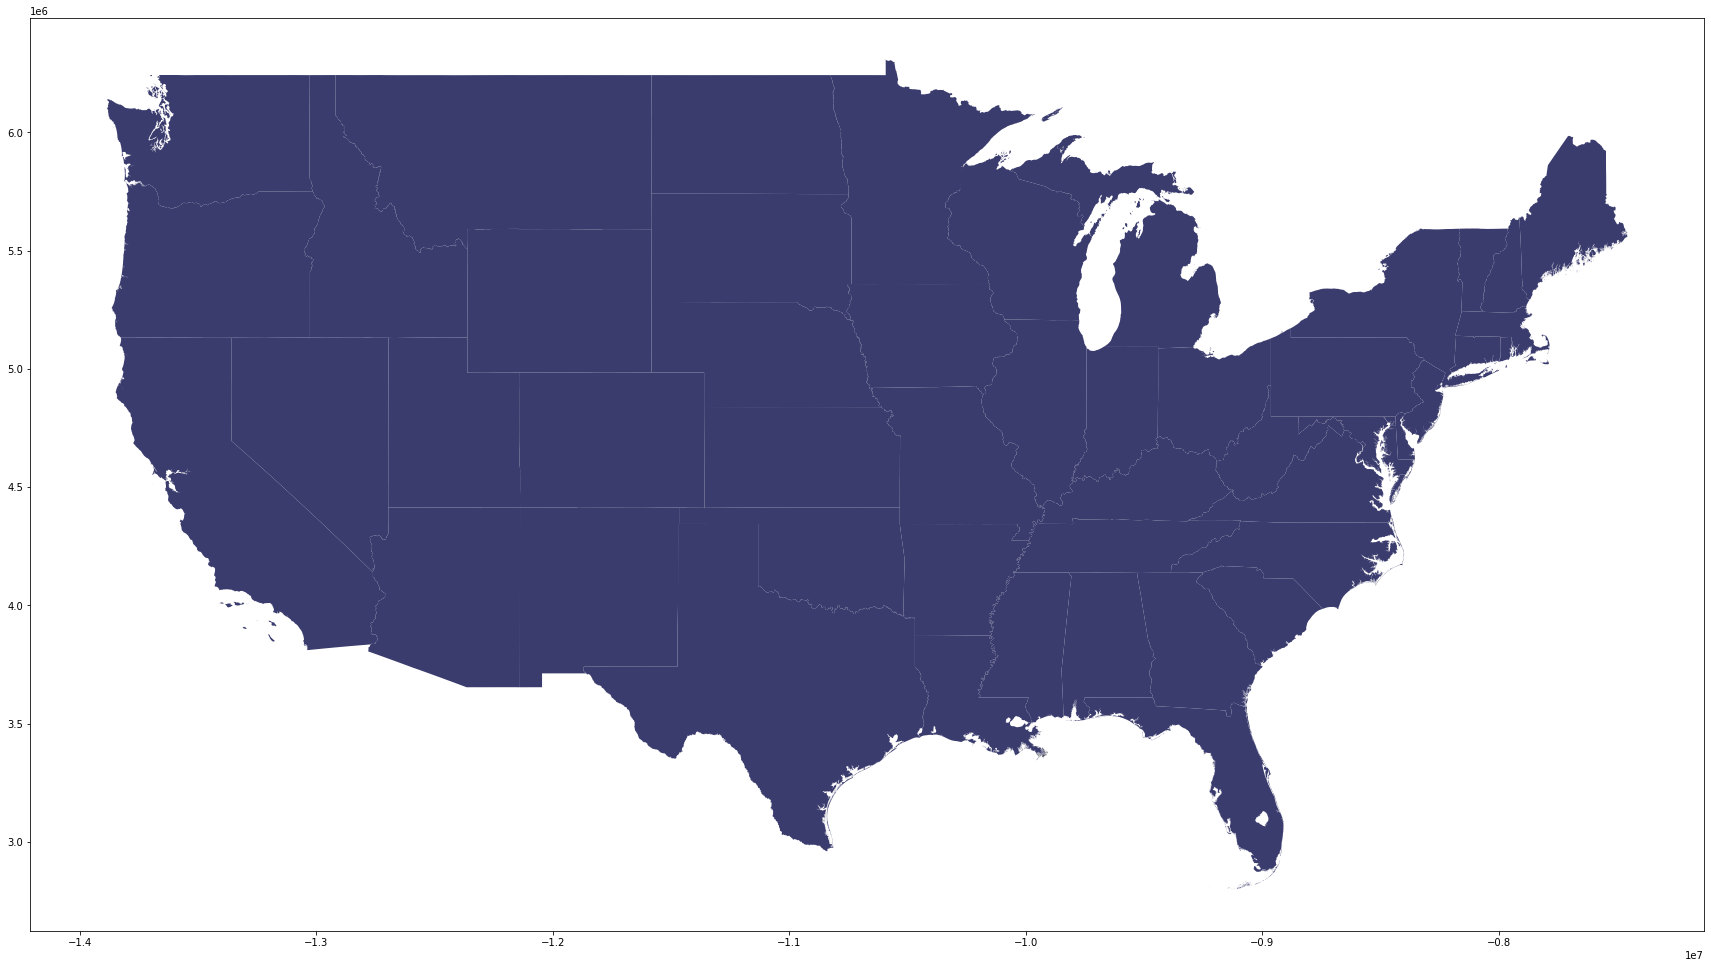

In [79]:
# Drop territories and states outside of the continental U.S. 
states = states[states['NAME'].isin(['Alaska','Hawaii','Guam', 'Puerto Rico', 'Northern Marianas', 'Virgin Islands', 'American Samoa']) == False]#.plot( figsize=(30,20), color='#3B3C6E')

# Plot data 
states[states['NAME'].isin(['Alaska', 'Hawaii','Guam', 'Puerto Rico', 'Northern Marianas', 'Virgin Islands', 'American Samoa']) == False].plot(figsize=(30,20), color='#3B3C6E')

In [80]:
# Drop all columns leaving state name and geometry 
states = states.drop(['STATE', 'FIPS', 'LON', 'LAT'], axis = 1)

In [81]:
# Rename states NAME column to state in order to match dta_na variables  
states = states.rename(columns={'NAME': 'state'})

# Check data 
states.head()

,state,geometry
1,Alabama,"MULTIPOLYGON (((-9808372.292 3515346.142, -980..."
2,Arkansas,"POLYGON ((-10200189.806 4344114.254, -10200037..."
4,Arizona,"POLYGON ((-12299790.517 4413891.284, -12299411..."
5,California,"MULTIPOLYGON (((-13183144.615 3845606.208, -13..."
6,Colorado,"POLYGON ((-11897336.824 4984745.337, -11895433..."


In [82]:
# Merge states df and dta_na 
# Left join 
geo_merge = dta_geo.merge(states, how='left')

# Convert geo_merge to Geo df 
geo_merge = GeoDataFrame(geo_merge)
# Check data
geo_merge.sample(10, random_state = 123)

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,start_date,end_date,n_days,geometry
48,Washington,36.80%,No,Entire State,6/26/20,53.0,7294336.0,69.083848,11.472417,70116.0,...,53,90596,2199,1242.004755,30.146678,1,2020-03-25,2020-05-31,68 days,"MULTIPOLYGON (((-13730263.951 5775021.490, -13..."
35,North Dakota,63.00%,Yes,Parts of State,NaN,38.0,752201.0,85.014112,10.898887,63473.0,...,38,20986,237,2789.945772,31.507536,0,1970-01-01,1970-01-01,0 days,"POLYGON ((-10823894.354 6242462.771, -10824027..."
30,New Hampshire,46.50%,No,Parts of State,NaN,33.0,1343622.0,90.393504,7.869211,74057.0,...,33,8208,439,610.886097,32.672880,0,2020-03-27,2020-06-15,81 days,"POLYGON ((-7913056.710 5639328.800, -7912823.1..."
24,Minnesota,44.90%,No,Entire State,7/25/20,27.0,5527358.0,80.292809,10.130997,68411.0,...,27,97690,2067,1767.390497,37.395805,1,2020-03-27,2020-05-17,52 days,"MULTIPOLYGON (((-10264023.602 5862785.888, -10..."
18,Louisiana,58.10%,Yes,Entire State,7/13/20,22.0,4663616.0,58.844146,19.383758,47942.0,...,22,166315,5480,3566.224149,117.505386,1,2020-03-22,2020-05-15,55 days,"MULTIPOLYGON (((-9953484.593 3344904.715, -995..."
11,Hawaii,30.00%,No,Entire State,4/20/20,15.0,1422029.0,22.118818,9.938813,78084.0,...,15,12351,131,868.547688,9.212189,1,2020-03-25,2020-05-31,68 days,None
21,Maryland,33.90%,No,Entire State,4/18/20,24.0,6003435.0,51.385049,9.442021,81868.0,...,24,124371,3938,2071.663972,65.595780,1,2020-03-05,2020-09-28,208 days,"MULTIPOLYGON (((-8442676.012 4548170.074, -844..."
13,Illinois,38.40%,No,Entire State,5/1/20,17.0,12821497.0,61.570704,13.060497,63575.0,...,17,293169,8877,2286.542671,69.235285,1,2020-03-25,2020-05-31,68 days,"POLYGON ((-10089998.578 5208563.686, -10089619..."
43,Tennessee,60.70%,Yes,Parts of State,NaN,47.0,6651089.0,74.035169,16.127948,50972.0,...,47,190991,2362,2871.574865,35.512981,0,2020-03-31,2020-04-30,31 days,"POLYGON ((-9801102.281 4368796.060, -9798853.3..."
0,Alabama,62.10%,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,27 days,"MULTIPOLYGON (((-9808372.292 3515346.142, -980..."


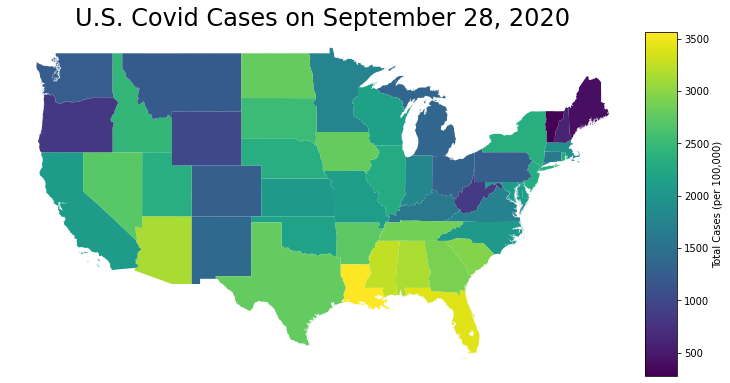

In [83]:
# Create choropleth with total_deaths_per100k data 
# Specify size of plot
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
fig, ax = plt.subplots(figsize =(12, 10))

# Adjust axis location
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot data 
geo_merge.plot(column='total_cases_per100k', 
               ax=ax, 
               legend=True,  
               legend_kwds={'label': "Total Cases (per 100,000)"},
               cax=cax)
# Plot Title 
ax.set_title('U.S. Covid Cases on September 28, 2020', fontsize=24, fontweight=3)

# Remove plot axis
ax.axis('off')

# Remove output text generated by ax.set
for txt in ax.texts:
    txt.set_visible(False)

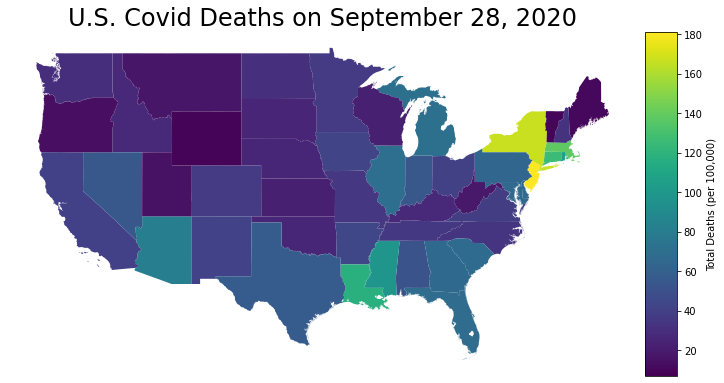

In [84]:
# Create choropleth with total_deaths_per100k data 
# Specify size of plot
fig, ax = plt.subplots(figsize =(12, 10))

# Adjust axis location
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot data 
geo_merge.plot(column='total_deaths_per100k', 
               ax=ax, 
               legend=True,  
               legend_kwds={'label': "Total Deaths (per 100,000)"},
               cax=cax)

ax.set_title('U.S. Covid Deaths on September 28, 2020', fontsize=24, fontweight=3)
ax.axis('off')

# Remove output text generated by ax.set
for txt in ax.texts:
    txt.set_visible(False)

### (C) Display the average length of stay at home orders and the median length (including states that didn’t implement any order). Additionally, find the state(s) that had the shortest stay-at-home orders among states that did implement an order. (Points: 2)

In [85]:
# Convert NAs to zeros 
dta_na['n_days'] = dta_na['n_days'].fillna(pd.Timedelta(seconds=0))

# Average of n_days 
dta_na['n_days'].mean()

Timedelta('52 days 21:38:49.411764706')

In [86]:
# Median of n_days
dta_na['n_days'].median()

Timedelta('45 days 00:00:00')

In [87]:
# Non-Zero Minimum of n_days
non_zero_min = dta_na[dta_na['n_days'] > dta_na['n_days'].min()]['n_days'].min()
print(non_zero_min)

27 days 00:00:00


In [88]:
# For loop to identify states with n_days value equal to non_zero_min 
for x in range(len(dta_na)): 
    if dta_na['n_days'].iloc[x] == non_zero_min:
        print(dta_na.iloc[x])

state                                              Alabama
trump_2016_vote_share                               62.10%
trump_won                                              Yes
mask_requirement_detail                       Entire State
maskreq_effective_date                             7/16/20
State_FIPS                                             1.0
State_Population                                 4864680.0
Pct_White_Non_Hispanic                           65.713058
Pct_Population_in_Poverty                        17.489743
Median_Household_Income                            48486.0
Pct_Population_No_Health_Insurance                9.978475
effective                             4/4/2020 - 4/30/2020
enforcement                                             No
date                                            2020-09-28
fips                                                     1
cases                                               152983
deaths                                                25

## Question 4
### (A) Compare the correlations of cases and deaths per 100,000 residents with the demographic variables contained in the state_ACS_data.csv file as well as the percentage of votes for Donald Trump. Briefly comment on any patterns you notice. (Points: 3)

In [89]:
# Numpy method of finding one correlation
np.corrcoef(dta_na['total_cases_per100k'], dta_na['State_Population'])[0,1]

0.21936951576777178

In [90]:
# Create a new data frame 
corr_df = pd.DataFrame(dta_na) 
# Convert Percentage string to float
corr_df["trump_2016_vote_share"] = corr_df["trump_2016_vote_share"].str.rstrip('%').astype('float') / 100.0
# Check data 
corr_df.head()

,state,trump_2016_vote_share,trump_won,mask_requirement_detail,maskreq_effective_date,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,...,date,fips,cases,deaths,total_cases_per100k,total_deaths_per100k,m_mandate,start_date,end_date,n_days
0,Alabama,0.621,Yes,Entire State,7/16/20,1.0,4864680.0,65.713058,17.489743,48486.0,...,2020-09-28,1,152983,2501,3144.770057,51.411398,1,2020-04-04,2020-04-30,27 days
1,Alaska,0.513,Yes,Parts of State,NaN,2.0,738516.0,61.035103,10.804469,76715.0,...,2020-09-28,2,8477,52,1147.842430,7.041147,0,2020-03-28,2020-04-24,28 days
2,Arizona,0.481,Yes,Parts of State (Employees Only),NaN,4.0,6946685.0,55.074989,16.087707,56213.0,...,2020-09-28,4,217513,5624,3131.176957,80.959479,0,2020-03-31,2020-05-15,46 days
3,Arkansas,0.606,Yes,Entire State,7/20/20,5.0,2990671.0,72.687668,17.579624,45726.0,...,2020-09-28,5,82049,1329,2743.498031,44.438188,1,1970-01-01,1970-01-01,0 days
4,California,0.315,No,Entire State,6/18/20,6.0,39148760.0,37.538446,14.286675,71228.0,...,2020-09-28,6,814796,15641,2081.281757,39.952734,1,2020-03-19,2020-09-28,194 days


In [91]:
# Drop variables that will not be correlated 
corr_df = corr_df.drop(['trump_won', 'date', 'enforcement', 'effective', 'mask_requirement_detail', 'maskreq_effective_date', 'State_FIPS', 'fips', 'cases', 'deaths', 'm_mandate', 'n_days', 'start_date', 'end_date'], axis = 1)
# Check data 
corr_df.head()

,state,trump_2016_vote_share,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
0,Alabama,0.621,4864680.0,65.713058,17.489743,48486.0,9.978475,3144.770057,51.411398
1,Alaska,0.513,738516.0,61.035103,10.804469,76715.0,14.417467,1147.842430,7.041147
2,Arizona,0.481,6946685.0,55.074989,16.087707,56213.0,10.942914,3131.176957,80.959479
3,Arkansas,0.606,2990671.0,72.687668,17.579624,45726.0,9.037174,2743.498031,44.438188
4,California,0.315,39148760.0,37.538446,14.286675,71228.0,8.485982,2081.281757,39.952734


In [48]:
# Assign correlations to object 
correlations = corr_df.corr()
correlations

,trump_2016_vote_share,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
trump_2016_vote_share,1.000000,-0.178531,0.485463,0.287934,-0.696187,0.493655,0.235718,-0.311191
State_Population,-0.178531,1.000000,-0.408899,0.122588,0.066323,0.217165,0.219370,0.247892
Pct_White_Non_Hispanic,0.485463,-0.408899,1.000000,-0.234247,-0.296291,-0.242584,-0.324677,-0.356649
Pct_Population_in_Poverty,0.287934,0.122588,-0.234247,1.000000,-0.745421,0.393737,0.421706,0.124127
Median_Household_Income,-0.696187,0.066323,-0.296291,-0.745421,1.000000,-0.412453,-0.280141,0.231816
Pct_Population_No_Health_Insurance,0.493655,0.217165,-0.242584,0.393737,-0.412453,1.000000,0.417619,-0.133517
total_cases_per100k,0.235718,0.219370,-0.324677,0.421706,-0.280141,0.417619,1.000000,0.416641
total_deaths_per100k,-0.311191,0.247892,-0.356649,0.124127,0.231816,-0.133517,0.416641,1.000000


In [93]:
# Print total_cases_per100k correlations
print(correlations["total_cases_per100k"])

trump_2016_vote_share                 0.235718
State_Population                      0.219370
Pct_White_Non_Hispanic               -0.324677
Pct_Population_in_Poverty             0.421706
Median_Household_Income              -0.280141
Pct_Population_No_Health_Insurance    0.417619
total_cases_per100k                   1.000000
total_deaths_per100k                  0.416641
Name: total_cases_per100k, dtype: float64


In [94]:
# Print total_deaths_per100k correlations
print(correlations["total_deaths_per100k"])

trump_2016_vote_share                -0.311191
State_Population                      0.247892
Pct_White_Non_Hispanic               -0.356649
Pct_Population_in_Poverty             0.124127
Median_Household_Income               0.231816
Pct_Population_No_Health_Insurance   -0.133517
total_cases_per100k                   0.416641
total_deaths_per100k                  1.000000
Name: total_deaths_per100k, dtype: float64


<AxesSubplot:>

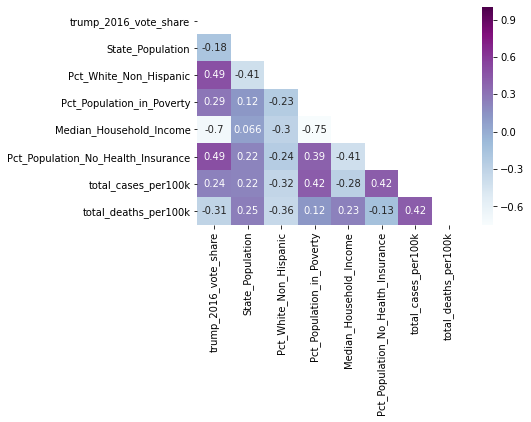

In [95]:
# Get lower triangle of the matrix
matrix = np.triu(correlations)

# Use the lower triangle matrix as a mask 
sns.heatmap(correlations, annot=True, mask=matrix, cmap = "BuPu")

#### It appears that *Pct_Population_in_Poverty* and *Pct_Population_No_Health_Insurance* have the highest correlation with *total_case_per100k*. Meanwhile, *Pct_White_Non_Hispanic* had a strong negative correlation with *total_deaths_per100k*.

### (B) For the demographic variable that is most strongly correlated with deaths per 100,000 residents, create a scatterplot of this variable on the x-axis, against deaths per 100,000 on the y-axis. (Points: 2)

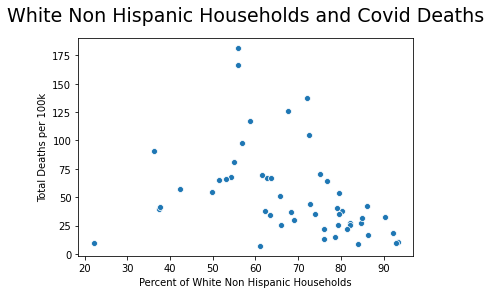

In [99]:
# Scatterplot of State Population and deaths per 100k
corr_plot = sns.scatterplot(data = dta_na, x = 'Pct_White_Non_Hispanic', y = 'total_deaths_per100k') 
corr_plot.set(xlabel = "Percent of White Non Hispanic Households", ylabel = "Total Deaths per 100k")
corr_plot.set_title('White Non Hispanic Households and Covid Deaths', fontsize=19, fontweight=3, y =1.05)

# Remove output text generated by corr_plot.set
for txt in corr_plot.texts:
    txt.set_visible(False)


# Part II: COVID Data Over Time
## Question 1
### Using the original data from the us_states.csv file, find the state that has recorded the highest number of new cases per 100,000 residents between September 1 and September 28, inclusive. Display the state and the number of new cases per 100,000 residents. (Points: 2)

In [50]:
# Sort df by state and date 
state_sorted = us_states.sort_values(by=['state', 'date'])
state_sorted.tail()

,date,state,fips,cases,deaths
11343,2020-09-24,Wyoming,56,5305,50
11398,2020-09-25,Wyoming,56,5420,50
11453,2020-09-26,Wyoming,56,5465,50
11508,2020-09-27,Wyoming,56,5633,50
11563,2020-09-28,Wyoming,56,5754,50


In [51]:
# Create new_case and new_deaths variables
state_sorted['new_cases'] = 6
state_sorted['new_deaths'] = 0 

In [52]:
# Create a list of states
state_list = state_sorted['state'].unique()
# Check list
state_list[1:10]

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida'],
      dtype=object)

In [53]:
# Create new variable subtracting cases by previous date 
y = 0 
# Loop through data 
for x in range(len(state_sorted) - 1): 
    # If state variable is equivalent to state found in state_list
    if state_sorted['state'].iloc[x] == state_list[y]: 
        # Add subtracted value of current case and previous case value to new_case column 
        state_sorted['new_cases'].iloc[x + 1] = state_sorted['cases'].iloc[x+1] - state_sorted['cases'].iloc[x]
    else: 
        # Increase counter value 
        y+=1 
        # Assign the new_case value of a new state as case value 
        state_sorted['new_cases'].iloc[x] = state_sorted['cases'].iloc[x]


In [54]:
# Create new variable subtracting deaths by previous date 
y = 0 
# Loop through data 
for x in range(len(state_sorted) - 1): 
    # If state variable is equivalent to state found in state_list
    if state_sorted['state'].iloc[x] == state_list[y]: 
        # Add subtracted value of current deaths and previous deaths value to new_deaths column 
        state_sorted['new_deaths'].iloc[x + 1] = state_sorted['deaths'].iloc[x+1] - state_sorted['deaths'].iloc[x]
    else: 
        # Increase counter value 
        y+=1 
        # Assign the new_case value of a new state as deaths value 
        state_sorted['new_deaths'].iloc[x] = state_sorted['deaths'].iloc[x]

In [55]:
# Merge Population data to state_sorted
state_sorted = state_sorted.merge(state_ACS, how='left')
state_sorted.head()

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance
0,2020-03-13,Alabama,1,6,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
1,2020-03-14,Alabama,1,12,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
2,2020-03-15,Alabama,1,23,0,11,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
3,2020-03-16,Alabama,1,29,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475
4,2020-03-17,Alabama,1,39,0,10,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475


In [56]:
# Create total_cases_per100k variable 
state_sorted = state_sorted.assign(total_cases_per100k = (state_sorted.new_cases / state_sorted.State_Population) * 100000)
state_sorted = state_sorted.assign(total_deaths_per100k = (state_sorted.new_deaths / state_sorted.State_Population) * 100000)
state_sorted.sample(10, random_state = 123)

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
9155,2020-08-07,South Carolina,45,98219,1962,1422,19,45.0,4955925.0,63.700984,16.008037,51015.0,11.016274,28.692928,0.383379
304,2020-06-24,Alaska,2,926,10,21,0,2.0,738516.0,61.035103,10.804469,76715.0,14.417467,2.843540,0.000000
1626,2020-07-04,Delaware,10,11996,512,73,0,10.0,949495.0,62.730504,11.887043,65627.0,6.043479,7.688297,0.000000
5870,2020-09-06,Montana,30,8272,117,94,1,30.0,1041732.0,86.294076,13.681822,52559.0,10.219309,9.023434,0.095994
7100,2020-07-31,New York,36,419723,32372,642,10,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.272429,0.050972
10074,2020-03-15,Vermont,50,8,0,3,0,50.0,624977.0,92.967101,11.166118,60076.0,4.097942,0.480018,0.000000
1260,2020-08-14,Colorado,8,52587,1892,345,6,8.0,5531141.0,68.308004,10.915415,68811.0,8.123337,6.237411,0.108477
7401,2020-04-11,North Dakota,38,293,7,15,0,38.0,752201.0,85.014112,10.898887,63473.0,7.400430,1.994148,0.000000
7423,2020-05-03,North Dakota,38,1191,25,38,1,38.0,752201.0,85.014112,10.898887,63473.0,7.400430,5.051841,0.132943
741,2020-06-12,Arkansas,5,11547,176,731,5,5.0,2990671.0,72.687668,17.579624,45726.0,9.037174,24.442675,0.167187


In [57]:
# Filter data by date 
start_date = '2020-09-01'
end_date = '2020-09-28'

after_start_date = state_sorted["date"] >= start_date
before_end_date = state_sorted["date"] <= end_date

between_two_dates = after_start_date & before_end_date
sept_month_covid = state_sorted.loc[between_two_dates]
 
sept_month_covid.sample(10, random_state = 123)

# Display state and and number of cases 
sept_month_covid.head(20)

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
172,2020-09-01,Alabama,1,127616,2200,1558,18,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,32.026773,0.370014
173,2020-09-02,Alabama,1,128239,2217,623,17,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,12.806598,0.349458
174,2020-09-03,Alabama,1,129285,2233,1046,16,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,21.501928,0.328901
175,2020-09-04,Alabama,1,130393,2266,1108,33,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,22.776421,0.678359
176,2020-09-05,Alabama,1,131803,2275,1410,9,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,28.984435,0.185007
177,2020-09-06,Alabama,1,132314,2276,511,1,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,10.504288,0.020556
178,2020-09-07,Alabama,1,132973,2276,659,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,13.546626,0.000000
179,2020-09-08,Alabama,1,133606,2277,633,1,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,13.012161,0.020556
180,2020-09-09,Alabama,1,134417,2285,811,8,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,16.671189,0.164451
181,2020-09-10,Alabama,1,135565,2301,1148,16,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,23.598675,0.328901


In [58]:
# For loop to find max value observation 
for x in range(len(sept_month_covid)): 
    if sept_month_covid['total_cases_per100k'].iloc[x] == max(sept_month_covid['total_cases_per100k']):
        print(sept_month_covid.iloc[x])

date                                  2020-09-21
state                                      Texas
fips                                          48
cases                                     744736
deaths                                     15212
new_cases                                  22276
new_deaths                                    53
State_FIPS                                  48.0
State_Population                      27885195.0
Pct_White_Non_Hispanic                 42.342408
Pct_Population_in_Poverty              15.455659
Median_Household_Income                  59570.0
Pct_Population_No_Health_Insurance     17.378943
total_cases_per100k                    79.884684
total_deaths_per100k                    0.190065
Name: 9841, dtype: object


## Question 2
### Using the original data from the us_states.csv file, create new variables equal to the number of daily new cases and deaths. Display summary statistics for these two variables. (Points: 2)


#### Please see question 1 for new_cases and new_deaths variables 

In [59]:
# Check data
pd.options.display.max_rows = 50
state_sorted.head(50)

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
0,2020-03-13,Alabama,1,6,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.123338,0.000000
1,2020-03-14,Alabama,1,12,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.123338,0.000000
2,2020-03-15,Alabama,1,23,0,11,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.226120,0.000000
3,2020-03-16,Alabama,1,29,0,6,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.123338,0.000000
4,2020-03-17,Alabama,1,39,0,10,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.205563,0.000000
5,2020-03-18,Alabama,1,51,0,12,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.246676,0.000000
6,2020-03-19,Alabama,1,78,0,27,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.555021,0.000000
7,2020-03-20,Alabama,1,106,0,28,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.575577,0.000000
8,2020-03-21,Alabama,1,131,0,25,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.513908,0.000000
9,2020-03-22,Alabama,1,157,0,26,0,1.0,4864680.0,65.713058,17.489743,48486.0,9.978475,0.534465,0.000000


In [60]:
# Summary statistics of new_deaths variable
state_sorted['new_deaths'].describe()

count    11564.000000
mean        17.722328
std         55.748189
min       -102.000000
25%          0.000000
50%          4.000000
75%         15.000000
max       1877.000000
Name: new_deaths, dtype: float64

In [61]:
# Summary statistics of new_cases variable
state_sorted['new_cases'].describe()

count    11564.000000
mean       620.610861
std       1293.775592
min      -7757.000000
25%         36.000000
50%        222.000000
75%        683.250000
max      22276.000000
Name: new_cases, dtype: float64

#### Given the negative min values in *new_cases* and *new_deaths*, it appears that there is either an input or a computational error in the data. Hence, further investigation into the data and code is required

In [62]:
# Function to locate negative values within df 
negative_new = []
def locate_value(state_sorted, new_cases): 
    for x in range(len(state_sorted)): 
        if state_sorted[new_cases].iloc[x] < 0:
            negative_new.append(state_sorted.iloc[x])
    

In [63]:
# Call function (new_cases)
locate_value(state_sorted, 'new_cases')
# Return portion of negative_new list values 
negative_new[1:5]

[date                                  2020-09-19
 state                                    Arizona
 fips                                           4
 cases                                     213551
 deaths                                      5471
 new_cases                                   -112
 new_deaths                                    16
 State_FIPS                                   4.0
 State_Population                       6946685.0
 Pct_White_Non_Hispanic                 55.074989
 Pct_Population_in_Poverty              16.087707
 Median_Household_Income                  56213.0
 Pct_Population_No_Health_Insurance     10.942914
 total_cases_per100k                     -1.61228
 total_deaths_per100k                    0.230326
 Name: 638, dtype: object, date                                  2020-08-15
 state                                   Arkansas
 fips                                           5
 cases                                      51992
 deaths                 

In [64]:
# Call function (new_deaths)
locate_value(state_sorted, 'new_deaths')
# Return portion of negative_new list values 
negative_new[1:5]

[date                                  2020-09-19
 state                                    Arizona
 fips                                           4
 cases                                     213551
 deaths                                      5471
 new_cases                                   -112
 new_deaths                                    16
 State_FIPS                                   4.0
 State_Population                       6946685.0
 Pct_White_Non_Hispanic                 55.074989
 Pct_Population_in_Poverty              16.087707
 Median_Household_Income                  56213.0
 Pct_Population_No_Health_Insurance     10.942914
 total_cases_per100k                     -1.61228
 total_deaths_per100k                    0.230326
 Name: 638, dtype: object, date                                  2020-08-15
 state                                   Arkansas
 fips                                           5
 cases                                      51992
 deaths                 

In [65]:
# Examine a negative observation to determine whether error can be attributed 
# to the loop or error within the data itself
state_sorted[state_sorted['state'] == 'Massachusetts']
state_sorted[4846: 4851]

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
4846,2020-08-31,Massachusetts,25,128533,9060,304,11,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,4.450826,0.161050
4847,2020-09-01,Massachusetts,25,128888,9064,355,4,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,5.197511,0.058563
4848,2020-09-02,Massachusetts,25,121131,9060,-7757,-4,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,-113.569265,-0.058563
4849,2020-09-03,Massachusetts,25,121546,9077,415,17,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,6.075963,0.248895
4850,2020-09-04,Massachusetts,25,121758,9100,212,23,25.0,6830193.0,72.185544,10.772055,77378.0,2.804464,3.103865,0.336740


In [66]:
# Second example 
state_sorted[state_sorted['state'] == 'New York']
state_sorted[7104: 7109]

,date,state,fips,cases,deaths,new_cases,new_deaths,State_FIPS,State_Population,Pct_White_Non_Hispanic,Pct_Population_in_Poverty,Median_Household_Income,Pct_Population_No_Health_Insurance,total_cases_per100k,total_deaths_per100k
7104,2020-08-04,New York,36,422296,32422,746,9,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.802542,0.045875
7105,2020-08-05,New York,36,422935,32431,639,9,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.257138,0.045875
7106,2020-08-06,New York,36,423629,32329,694,-102,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.537486,-0.519919
7107,2020-08-07,New York,36,424349,32336,720,7,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.670014,0.035681
7108,2020-08-08,New York,36,425055,32345,706,9,36.0,19618453.0,55.863396,14.642242,65323.0,6.477077,3.598653,0.045875


#### It appears that that the values for *new_cases* on 2020-09-02 were logged incorrectly, as the number of cases and deaths decreased from 2020-09-01 (122888 to 121131 and 9064 to 9060). 

    10046	2020-09-01	Massachusetts	25	128888	9064	355	 4
    10101	2020-09-02	Massachusetts	25	121131	9060   -7757   -4
    10156	2020-09-03	Massachusetts	25	121546	9077	415    17
     
#### This is also the cases for *new_deaths* on 2020-08-06 (32431 to 32329). 

    8572	2020-08-05	New York	36	422935	32431	639	9
    8627	2020-08-06	New York	36	423629	32329	694	-102
    8682	2020-08-07	New York	36	424349	32336	720	7

#### Ideally, our next steps would be to examine the original data and see if the data could be fixed. Given that this is most likely not possible, we would want to conduct the analysis both with and without these negative values. I am concerned about this method, however because it does not appear that in most instances it was a one-time input error. Rather, proceeding inputs past the date were also less than the previous date. For instance, in the NY example below, the next two dates after 2020-08-06 have death observations that are less than the 2020-08-05 instance.

    8572	2020-08-05	New York	36	422935	32431	639	9
    8627	2020-08-06	New York	36	423629	32329	694	-102
    8682	2020-08-07	New York	36	424349	32336	720	7
    8737	2020-08-08	New York	36	425055	32345	706	9

## Question 3
### Pick a state that had a stay at home order that expired (before September 28) and generate a plot of daily new cases. Add vertical lines corresponding to the start and end dates of the stay-at-home order. Comment briefly on any patterns you notice. (Points: 3)


In [67]:
# Locate Michigan data and assign it to new df 
Michigan = state_sorted[state_sorted['state'] == 'Michigan']

In [68]:
# For loop to find index value of '2020-05-08'
for x in range(len(Michigan)): 
    if Michigan['date'].iloc[x] == '2020-05-08': 
        print(x)  

59


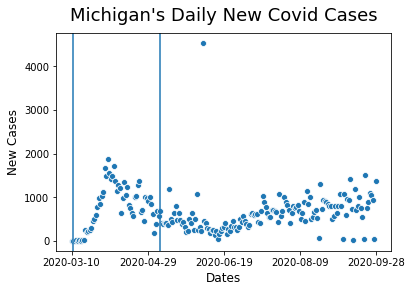

In [69]:
# Scatterplot Michigan df of date and new_cases 
Michigan_plot = sns.scatterplot(data = Michigan, x = 'date', y = 'new_cases')

# Labeling 
plt.xlabel("Dates", size=12)
plt.ylabel("New Cases", size=12)
plt.title("Michigan's Daily New Covid Cases", size=18, y =1.03)

# Specify xticks locations 
plt.setp(Michigan_plot,xticks=[0, round(len(Michigan)-1)/2, round(len(Michigan)-1)/4, round(len(Michigan)-1)*(3/4), len(Michigan)-1])

plt.axvline(1, 0)
plt.axvline(59, 0)

# Remove output text generated by plot
for txt in ax.texts:
    txt.set_visible(False)


#### Michigan's stay at home order was instituted on March 10, 2020 and ended on May 8, 2020. From the data, it appears that the order was instituted prior to the uptick in new cases. Living in Michigan during this time, I recall that the order was instituted primarily in reponse to the explosion of cases in nearby states and was a pre-emptive measure to prevent an increase in Michigan's case rate. However, many people did not abide by the order, and there was accordingly a sharp increase in cases until the beginning of April where the number of new cases fell at steady rate. By May 8, 2020, the stay at home order was lifted, and the rate of new cases continued to decrease until mid-June. From then, however, the case rate began to increase once again, as more people began interacting for summer holidays and activities. 

## Question 4
### Create a new DataFrame that contains the number of daily new cases and deaths per 100,000 residents among the states that Donald Trump won and the states that Hillary Clinton won (i.e., for a given date you should have one observation corresponding to the group of states that voted for Trump in 2016, and another corresponding to the group of states that voted for Clinton). Plot the number of daily new deaths per 100,000 over time in these two groups of states, using appropriate colors (i.e., red and blue) for the corresponding lines. Comment briefly on any patterns you notice. (Points: 3)

In [70]:
# Merge states_sorted and election_result data 
state_sorted_election = state_sorted.merge(election_results, how='outer')

# Assign new variables (deaths and cases by 100k)
state_sorted_election['new_cases_100k'] = ((state_sorted_election['new_cases']/state_sorted_election['State_Population']) * 100000).round(4)
state_sorted_election['new_deaths_100k'] = ((state_sorted_election['new_deaths']/state_sorted_election['State_Population']) * 100000).round(4)

# Aggregate state's new_cases and new_deaths values 
state_sorted_election = state_sorted_election.groupby(['trump_won', 'date']).sum().reset_index(['date', 'trump_won']) 

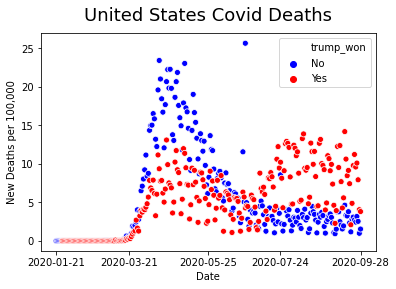

In [71]:
# Scatterplot of new covid deaths by State 
election_plot = sns.scatterplot(data = state_sorted_election, 
                                x = 'date', 
                                y = 'new_deaths_100k', 
                                hue = 'trump_won', 
                                palette = ['blue', 'red'])

# Labeling 
plt.xlabel("Date", size=10)
plt.ylabel("New Deaths per 100,000", size=10)

# Specify xticks locations 
plt.setp(election_plot, xticks=[0, 60, 125, 185, 251])

# Specify title
plt.title("United States Covid Deaths", size=18, y =1.03)

# Remove output text generated by ax.set
for txt in ax.texts:
    txt.set_visible(False)

#### States that were won by Hillary Clinton had much higher death rates by Covid than states won by Donald Trump near the start of the pandemic. The number of deaths peaked in April for both Clinton and Trump states, and all states saw a steady decrease in deaths. However, around June Trump states saw a steady increase resulting in an even higher peak of death rates in August than the peak in April. Meanwhile, Clinton states' death rates remain relatively low with little fluctation. 